In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import pathlib
data_dir = pathlib.Path('/Users/alfahwun/Documents/faces')


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

3596


In [ ]:
img_height = 64
img_width = 64

In [ ]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=8,
    validation_split=0.1,
    subset="both",
    seed=123,
    image_size=(img_height, img_width))


Found 3595 files belonging to 2 classes.
Using 3236 files for training.
Using 359 files for validation.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-07 23:45:25.059174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 23:45:25.059216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'smiling']


In [ ]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(8, (3, 3), 1, activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25


2023-03-07 23:45:26.769738: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2023-03-07 23:45:27.731310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.7361

2023-03-07 23:45:53.754825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 27s 63ms/step - loss: 0.6582 - accuracy: 0.7361 - val_loss: 0.4958 - val_accuracy: 0.7604
Epoch 2/25
405/405 [==============================] - 25s 63ms/step - loss: 0.4188 - accuracy: 0.8112 - val_loss: 0.4728 - val_accuracy: 0.7883
Epoch 3/25
405/405 [==============================] - 25s 63ms/step - loss: 0.3683 - accuracy: 0.8393 - val_loss: 0.4058 - val_accuracy: 0.8412
Epoch 4/25
405/405 [==============================] - 26s 63ms/step - loss: 0.3327 - accuracy: 0.8585 - val_loss: 0.7026 - val_accuracy: 0.7549
Epoch 5/25
405/405 [==============================] - 26s 63ms/step - loss: 0.3009 - accuracy: 0.8736 - val_loss: 0.5227 - val_accuracy: 0.7883
Epoch 6/25
405/405 [==============================] - 26s 63ms/step - loss: 0.2795 - accuracy: 0.8841 - val_loss: 0.3687 - val_accuracy: 0.8496
Epoch 7/25
405/405 [==============================] - 26s 63ms/step - loss: 0.2631 - accuracy: 0.8934 - val_loss: 0.3808 - val_accuracy: 0.8440
Epo

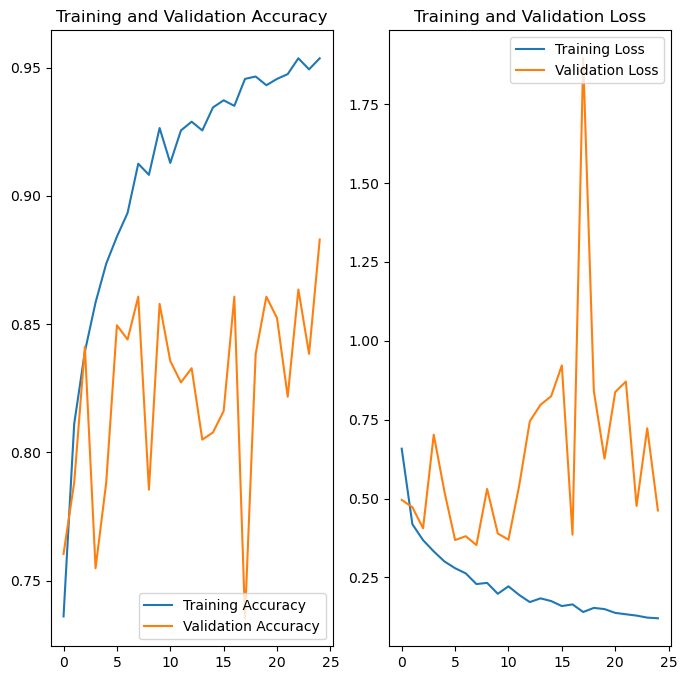

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
img = tf.keras.utils.load_img(
    "/Users/alfahwun/Downloads/Expressions/happy/ffhq_0.png", target_size=(img_height, img_width)
)
resize = tf.image.resize(img, (64,64))
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is smiling')
else:
    print(f'Predicted class is angry')

In [ ]:
import os
model.save(os.path.join('models','angrysmilingclassifier.h5'))